# Memoria Densamente Asociada

__*Una prespectiva bio-inspirada de redes neuronales*__

Mayo, 2022

## Redes Neuronales

 Una red neuronal artificial es un modelo matemático inspirado en redes neuronales biológicas. Consiste de un grupo entrelazado de nodos o neuronas artificiales individuales cuya estructura se escoge de acuerdo al problema que se enfrenta.

La estructura y funcionamiento del sistema nervioso central tiene como parte constituyente a la neurona biológica que consiste en un cuerpo celular, el axón, las dendritas y las sinapsis. Estas últimas son las conexiones entre neuronas. El mecanismo sináptico es el que se busca mapear a un algoritmo analítico.

<img src="neuron.png" width=400 height=400 />

Una neurona artificial se conoce también como _perceptrón_ y su forma básica es la siguiente:

\begin{equation}
  y(x_1, \dots, x_n) = f(w_1 x_1 + \dots w_n x_n + b). \\
\end{equation}

Donde cada $x_i$ se toma en cuenta individualmente por medio de un peso aprendido $w_i$.

Esto nos permite construir un mapeo de $(x_1, \dots, x_n) = \bf{x} \in \mathbb{R}^n$ a la variable de salida $y$. La función $f$ se puede definir como una función de salto:

\begin{equation*}
f(s)=\begin{cases}
          0 \quad &\text{if} \, s \leq 0 \\
          1 \quad &\text{if} \, s > 0 \\
     \end{cases}
\end{equation*}


El valor $b$ conocido como _bias o sesgo_ permite aplicar la función $f$ a hiperplanos que no pasan por el origen. De esta forma el perceptrón es la composición de una transformación afín seguida de una función de salto que también se denomina como _función de activación_. Esta no necesariamente es una función de salto y se elige según el problema que se esta tratando de resolver.

<img src="perceptron.png" width=200 height=200 />

## Memoria asociativa

El reconocimiento de patrones es una tarea que realizamos constantemente, si nos preguntan por un físico inglés cuyo nombre termina con la letra $n$ es muy posible que recordemos a _Newton_, más no sabemos si es la entrada $127$ de nuestros registros mentales de científicos famosos.

<img src="memorias.png" width=200 height=200 />


The phenomenon of pattern association may be formally stated as follows. Let s1 : t1, s2 : t2, …, sk : tk be a number of pairs of patterns. If there is a system that yields the pattern ti when presented as input with the pattern si, i = 1, …, k, then we say that the system is an associative or content addressable memory storing the pattern pairs s1: t1, …., sk : tk. The act of relating a given pattern si to its corresponding stored pattern ti is known as pattern association. One important property of an associative memory is its capacity to correctly associate a noisy input pattern to the desired output pattern. However, there is a limit to the extent of noise tolerable to a given associative memory network. \\

Associative memory neural nets are those which store a set of pattern associations. There are two kinds of associative memory neural nets. These are auto-associative and hetero-associative. In auto-associative neural nets, the input and output patterns are identical. In hetero-associative neural nets, the inputs and the outputs are different. \\

Regarding architecture, an associative memory neural net may be either feedforward type or recurrent (iterative) type. In feedforward nets, signals are unidirectional. They flow from input to output and not in the reverse direction. In recurrent (or iterative) nets, signals flow back and forth between the input and the output until the net reaches an equilibrium state. \\

La \emph{memoria asociativa} es el almacenamiento y recuperación de información por asociación datos de entrada. \\

## Redes de Hopfield

Una red de _Hopfield_ es un tipo de red neuronal artificial que busca modelar la forma en cómo usamos la memoria para reconocer patrones. 

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
num_p = 4   # Numero de patrones a aprender

# Para poder visualizar los patrones:
# cada arreglo podria verse como una matriz de 5 x 5
ancho = 5 
alto = 5

# Veces que vamos a actualizar el resultado de usar W
max_iteraciones = 10

In [8]:
# letra oscura
U =  [-1,1,1,1,-1,
      -1,1,1,1,-1,
      -1,1,1,1,-1,
      -1,1,1,1,
      -1,-1,-1,-1,-1,-1]

N = [-1,-1,1,1,-1,
    -1,-1,1,1,-1,
    -1,1,-1,1,-1,
    -1,1,1,-1,-1,
    -1,1,1,-1,-1]

A = [1,-1,-1,-1,1,
    -1,-1,1,-1,-1,
    -1,1,1,1,-1,
    -1,-1,-1,-1,-1,
    -1,1,1,1,-1]

M = [-1,1,1,1,-1,
     -1,-1,1,-1,-1,
     -1,1,-1,1,-1,
     -1,1,1,1,-1,
     -1,1,1,1,-1]

In [9]:
u_w = [-1*x for x in U]
n_w = [-1*x for x in N]
a_w = [-1*x for x in A]
m_w = [-1*x for x in M]

In [36]:
#letras = np.array([u_w,n_w,a_w,m_w],dtype=float)
letras = np.array([U,N,A,M],dtype=float)

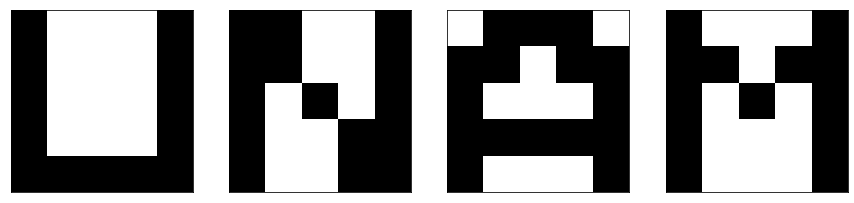

In [37]:
# Show the patterns
fig, ax = plt.subplots(1, num_p, figsize=(15, 10))

for i in range(num_p):
    ax[i].matshow(letras[i].reshape((alto, ancho)), cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

## Entrenamiento

El entrenamiento consiste en actualizar los pesos:



In [38]:
# Train 
W = np.zeros((ancho * alto, ancho * alto))

In [39]:
for i in range(ancho * alto):
    for j in range(ancho * alto):
        
        if i == j or W[i, j] != 0.0:
            continue
        w = 0.0
        
        for n in range(num_p):
            w += letras[n, i] * letras[n, j]
        W[i, j] = w / letras.shape[0]
        W[j, i] = W[i, j]

In [18]:
W.shape

(25, 25)

In [31]:
W[5]

array([ 0.5,  0. , -0.5, -0.5,  0.5,  0. ,  0.5, -1. ,  0. ,  1. ,  1. ,
       -1. ,  0. , -1. ,  1. ,  1. , -0.5, -0.5,  0. ,  1. ,  1. , -0.5,
       -0.5,  0. ,  1. ])

## Test

In [40]:
# Test the Network
# Letra con error o información faltante
no_U = np.array(  [1,1,1,1,1,-1,1,1,1,-1,-1,1,1,1,-1,-1,1,1,1,-1,-1,-1,-1,-1,-1],#  [1,-1,-1,-1,-1,1,1,1,1,1,-1,-1,1,1,1,-1,1,1,1,1,1,1,-1,-1,-1.],
   dtype=float)

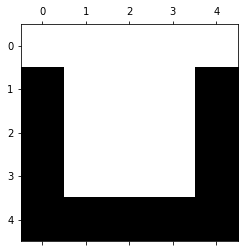

In [41]:

# Show the corrupted pattern
fig, ax = plt.subplots()
ax.matshow(no_U.reshape((alto, ancho)), cmap='gray')

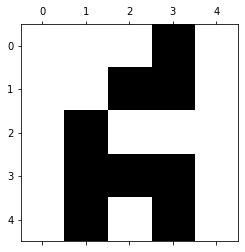

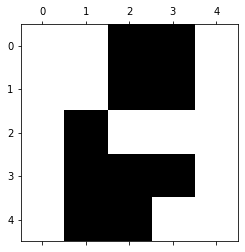

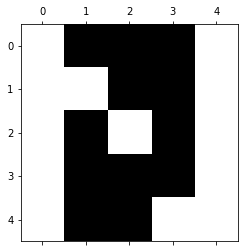

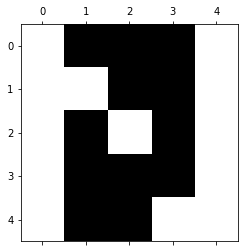

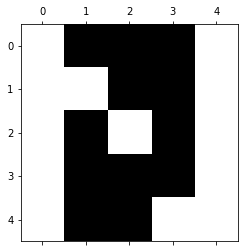

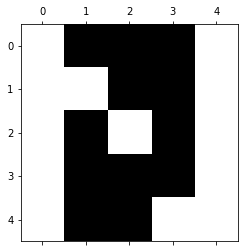

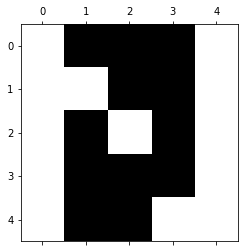

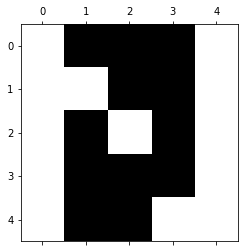

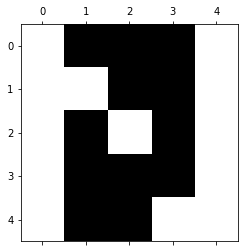

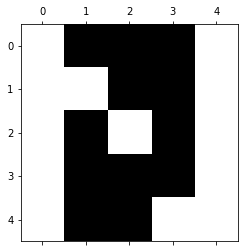

In [42]:
h = np.zeros((ancho * alto))
Mem = no_U

#Distancia de Hamming

hamming_d = np.zeros((max_iteraciones,num_p))

for iteracion in range(max_iteraciones):
    
    for i in range(ancho * alto):
        i = np.random.randint(ancho * alto)
        
        h[i] = 0
        
        for j in range(ancho * alto):
            h[i] += W[i, j]*Mem[j]
        Mem = np.where(h<0, -1, 1)
    
    for i in range(num_p):
        hamming_d[iteracion, i] = ((letras - Mem)[i]!= 0).sum()

    fig, ax = plt.subplots()
    ax.matshow(Mem.reshape((alto, ancho)), cmap='gray')

In [43]:
hamming_d

array([[18., 20., 15., 20.],
       [19., 23., 14., 21.],
       [21., 23., 14., 23.],
       [21., 23., 14., 23.],
       [21., 23., 14., 23.],
       [21., 23., 14., 23.],
       [21., 23., 14., 23.],
       [21., 23., 14., 23.],
       [21., 23., 14., 23.],
       [21., 23., 14., 23.]])

# Dense Associative Memory

K vectores que queremos memorizar denotados por $\xi_{i}^{\mu}$.

La ecuaciones que definen una red de Hopfield son: 
\begin{align*}
E &= - \sum_{i,j = 1}^{N} \sigma_i T_{ij} \sigma_j \\
T_{ij} &= \sum_{\mu = 1}^{K} \xi_{i}^{\mu} \xi_{j}^{\mu} \\
\end{align*}

\begin{align*}
E &= - \sum_{i,j = 1}^{N} \sigma_i \left( \sum_{\mu = 1}^{K} \xi_{i}^{\mu} \xi_{j}^{\mu} \right) \sigma_j \\
&= - \sum_{i,j = 1}^{N} \left( \sum_{\mu = 1}^{K}  \sigma_i \xi_{i}^{\mu} \xi_{j}^{\mu} \sigma_j \right) \\
&= - \sum_{\mu = 1}^{K} \left( \sum_{i,j = 1}^{N}  \sigma_i \xi_{i}^{\mu} \xi_{j}^{\mu} \sigma_j \right) \\
&= - \sum_{\mu = 1}^{K}  \sum_{i = 1}^{N} \left( \xi_{i}^{\mu} \sigma_i \right)^{2}  \\
&= - \sum_{\mu = 1}^{K}  f \left( \xi_{i}^{\mu} \sigma_i \right)  \\
\end{align*}

donde $f$ es una funcion cuadrática (suma sobre $i$ incluída).

Una Memoria Densamente Asociada (DAM) asume la forma general:

\begin{align*}
E = - \sum_{\mu = 1}^{K}  F \left( \xi_{i}^{\mu} \sigma_i \right)  \\
\end{align*}